In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import pandas as pd
from torch_geometric.utils import to_networkx
import networkx as nx

This notebook is used to generate some visuals that may be used in papers and presentations.

In [4]:
import seaborn as sns

In [6]:
cm = [[ 53,  34,  31,  26],
 [ 19, 201,  12,  13],
 [ 15,  57, 235,  77],
 [  5,   0,  16, 149]]

In [17]:
cm = [[ 43,  33,  34,  34],
 [ 19, 175,  28, 23],
 [ 15,  46, 213, 110],
 [  3,  0,   7, 160]]


[Text(0, 0.5, 'hap'),
 Text(0, 1.5, 'sad'),
 Text(0, 2.5, 'neu'),
 Text(0, 3.5, 'ang')]

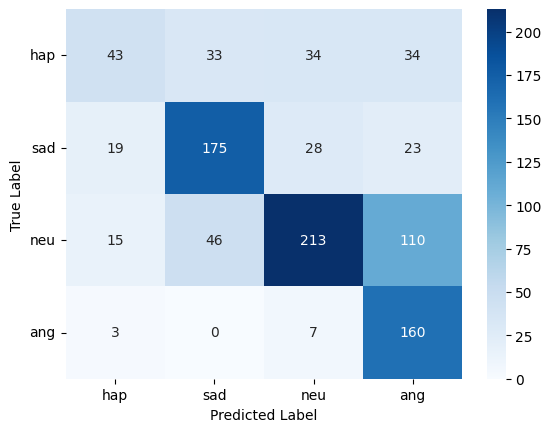

In [18]:
emotions = ['hap','sad','neu','ang']
ax = sns.heatmap(cm, annot=True,fmt='', cmap='Blues',xticklabels=emotions,yticklabels=emotions)
ax.set(xlabel="Predicted Label", ylabel="True Label")
ax.set_yticklabels(labels=emotions,rotation=0)

In [2]:
import os

os.chdir('/'.join(os.getcwd().split('\\')[:-2]))
from src import *

# Orthoganality

In [3]:
cora = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
#train_g, train_pos_g, train_neg_g, test_pos_g, test_neg_g = create_train_test_split_edge(cora[0])

In [4]:
base_feats = pd.DataFrame(cora[0]['x'])

In [16]:
test = base_feats.astype(int)

In [8]:
import phik

In [ ]:
test=test.phik_matrix()

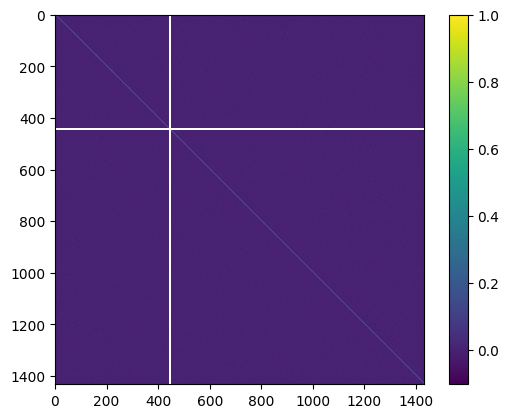

In [27]:
plt.imshow(base_feats.corr())
plt.colorbar()

In [21]:
np.mean(np.abs(base_feats.corr()))

0.010532545074931197

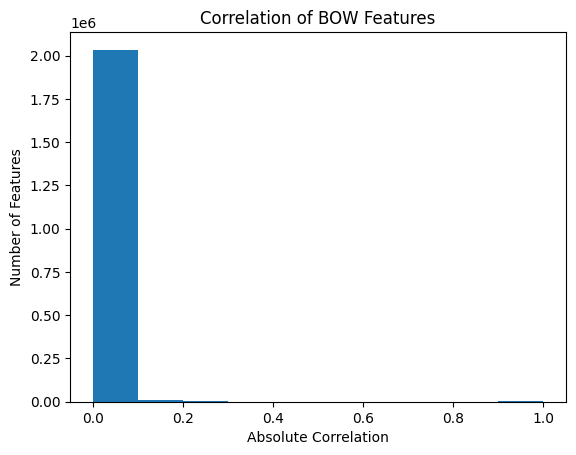

In [74]:
plt.hist(np.abs(base_feats.corr()).to_numpy().flatten())
plt.title('Correlation of BOW Features')
plt.ylabel('Number of Features')
plt.xlabel('Absolute Correlation')
plt.show()

In [28]:
LM_feats = pd.DataFrame(np.loadtxt('./LM_embed_cora.txt'))

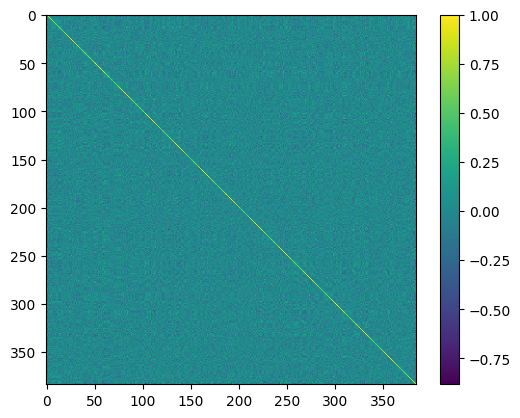

In [13]:
plt.imshow(LM_feats.corr())
plt.colorbar()

In [22]:
np.mean(np.abs(LM_feats.corr()))

0.09076351051909073

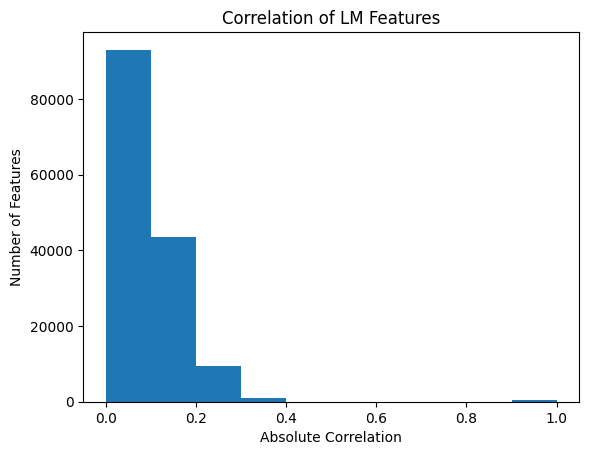

In [73]:
plt.hist(np.abs(LM_feats.corr()).to_numpy().flatten())
plt.title('Correlation of LM Features')
plt.ylabel('Number of Features')
plt.xlabel('Absolute Correlation')
plt.show()

In [30]:
TAPE_feats = pd.DataFrame(np.loadtxt('./TAPE_embed_cora.txt'))

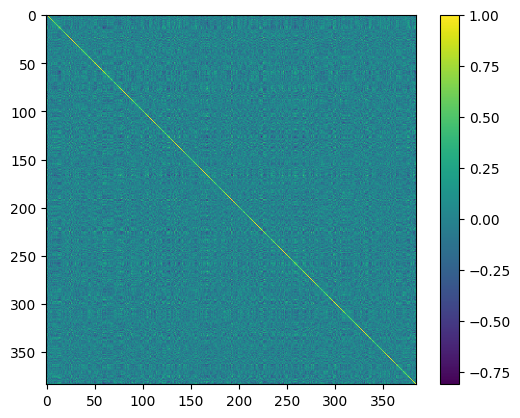

In [17]:
plt.imshow(TAPE_feats.corr())
plt.colorbar()

In [23]:
np.mean(np.abs(TAPE_feats.corr()))

0.12213915778109735

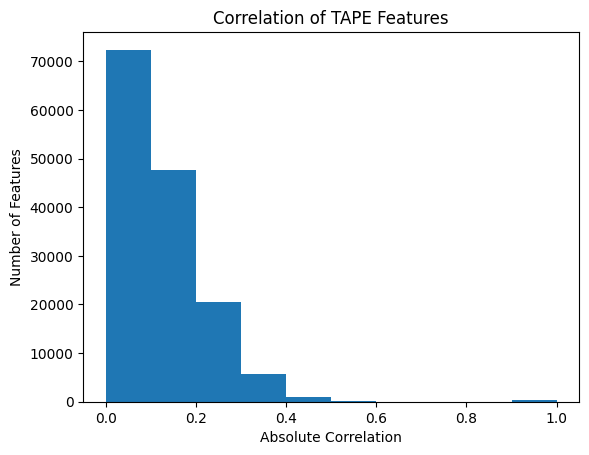

In [72]:
plt.hist(np.abs(TAPE_feats.corr()).to_numpy().flatten())
plt.title('Correlation of TAPE Features')
plt.ylabel('Number of Features')
plt.xlabel('Absolute Correlation')
plt.show()

# Task Correlation
- Entropy of features for classes

In [34]:
classes = cora[0]['y']

In [41]:
G = to_networkx(cora[0], node_attrs=cora[0].node_attrs(), to_undirected=cora[0].is_undirected())

In [65]:
percent_over = []
for i in range(len(classes)):
    node_class = classes[i]
    neighbors = list(G.neighbors(i))
    neigh_class = classes[neighbors]
    
    overlap = np.where(neigh_class==node_class)[0].size
    percent_over.append(overlap/len(neighbors))
#percent_over = percent_over/len(classes)

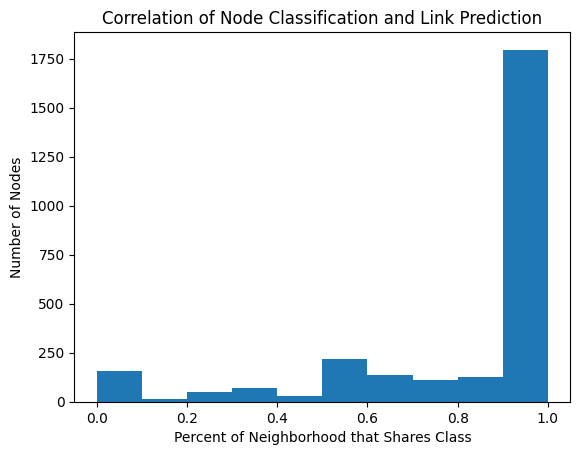

In [71]:
plt.hist(percent_over)
plt.title('Correlation of Node Classification and Link Prediction')
plt.ylabel('Number of Nodes')
plt.xlabel('Percent of Neighborhood that Shares Class')
plt.show()

# DeBERTa

In [6]:
feats = pd.DataFrame(np.loadtxt(f'LM_embed_cora_deb.txt'))

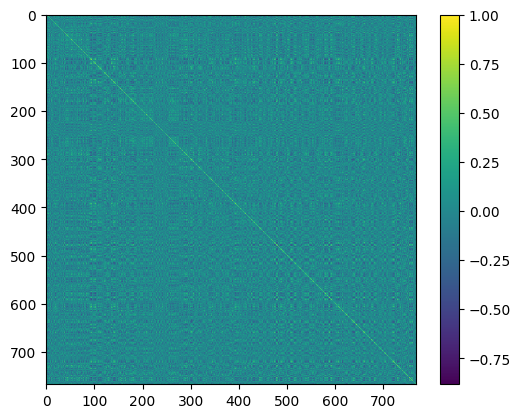

In [7]:
plt.imshow(feats.corr())
plt.colorbar()

In [8]:
np.mean(np.abs(feats.corr()))

0.23947699336414216

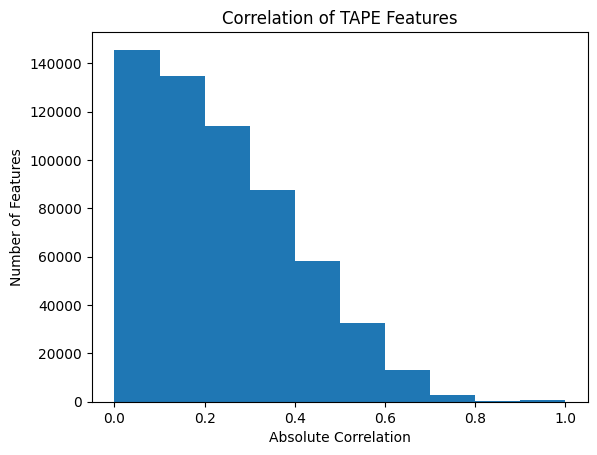

In [10]:
plt.hist(np.abs(feats.corr()).to_numpy().flatten())
plt.title('Correlation of TAPE Features')
plt.ylabel('Number of Features')
plt.xlabel('Absolute Correlation')
plt.show()